# Problem 1: Data with R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R

library(tidyverse)

In [20]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')
head(dat)

# A tibble: 6 x 2
      X label
  <dbl> <int>
1 2.46      0
2 1.55      0
3 5.51      0
4 0.119     0
5 7.51      0
6 0.800     0


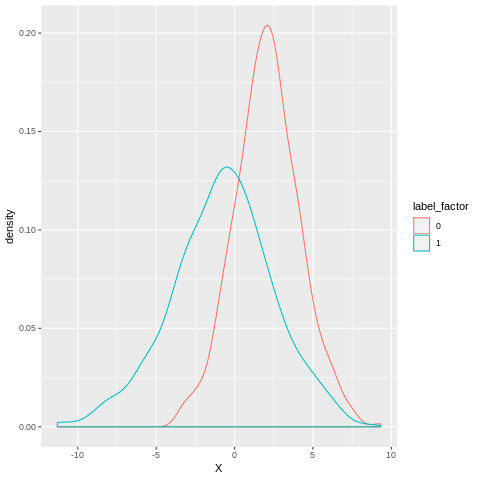

In [37]:
%%R

head(dat)

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!

#Checking class of label and changing it to a factor 

class(dat$label)
dat$label_factor = as.factor(dat$label)
class(dat$label_factor)

ggplot(dat, aes(X)) + 
    geom_density() + 
    facet_wrap(~label_factor)

ggplot(dat, aes(X, color = label_factor)) + 
    geom_density() 
    

# Problem 2: Using Classes in Python

In [38]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [68]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [72]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)

import random
dat1 = random.sample(dat, len(dat))
print(dat1)







[[3.552513194676888, 0], [-0.5547914210975184, 1], [7.2782226004466555, 0], [-5.8406412916449195, 1], [2.037146236535045, 1], [-2.9392179249659365, 1], [1.2098884707377664, 1], [6.307481326268624, 0], [1.366376182241103, 1], [0.17313563865561044, 1], [4.309891390817572, 0], [-3.3822990734146647, 1], [-1.7382394358436648, 1], [-1.1780187427011133, 0], [2.474937367506108, 0], [-2.8732056097983802, 1], [4.764958237225746, 0], [1.8533395762115095, 0], [0.9291275522790268, 1], [1.9596718289222013, 0], [4.656774199199251, 0], [-2.09493951848217, 1], [1.7009194360824087, 1], [1.710564728963808, 0], [2.8580869794262522, 0], [6.515546103103287, 0], [4.568510389548891, 0], [2.3520761563892973, 0], [2.2277758408935493, 0], [-1.164068138103106, 1], [0.5714502685597682, 1], [0.41206447036719074, 1], [1.1569736565201412, 1], [-2.4710414638346005, 1], [-3.0984532757304444, 1], [0.8348239936181097, 0], [0.3884179592790469, 0], [-7.580892272102961, 1], [1.8759373547881781, 0], [-0.38138764039928696, 1]

In [50]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat1[:50]]) != 0)

TypeError: 'NoneType' object is not subscriptable

## Problem 2.2: Splitting!

In [ ]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data



In [ ]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

## Problem 2.3: Testing models!

In [124]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label



In [ ]:
# Compare the two classes of models!